In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =  pd.read_csv("https://raw.githubusercontent.com/RitikRatnawat/LGMVIP-DataScience/main/Task%204%20-%20Prediction%20using%20Decision%20Tree%20Algorithm/Iris_Dataset.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
print("Number of rows in the dataset :", data.shape[0])
print("Number of columns in the dataset :", data.shape[1])

Number of rows in the dataset : 150
Number of columns in the dataset : 6


In [6]:
columns = data.columns.tolist()
print("List of Columns :", columns)

List of Columns : ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [7]:
data = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']]
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
data.describe(include = 'all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Visualizing Data

In [11]:
species_count = data['Species'].value_counts()
labels = species_count.index.tolist()
count = species_count.values.tolist()
species_count.to_frame()

,Species
Iris-virginica,50
Iris-setosa,50
Iris-versicolor,50


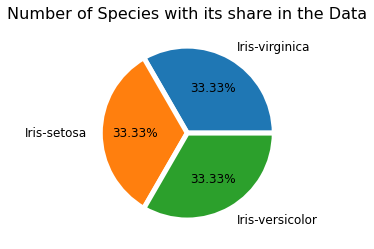

In [12]:
plt.pie(count, labels = labels, labeldistance = 1.15, wedgeprops = {'linewidth' : 5, 'edgecolor' : 'white'}, textprops = {'fontsize' : 12}, autopct = "%1.2f%%")
plt.title("Number of Species with its share in the Data", fontsize = 16)
plt.show()

<Figure size 1080x432 with 0 Axes>

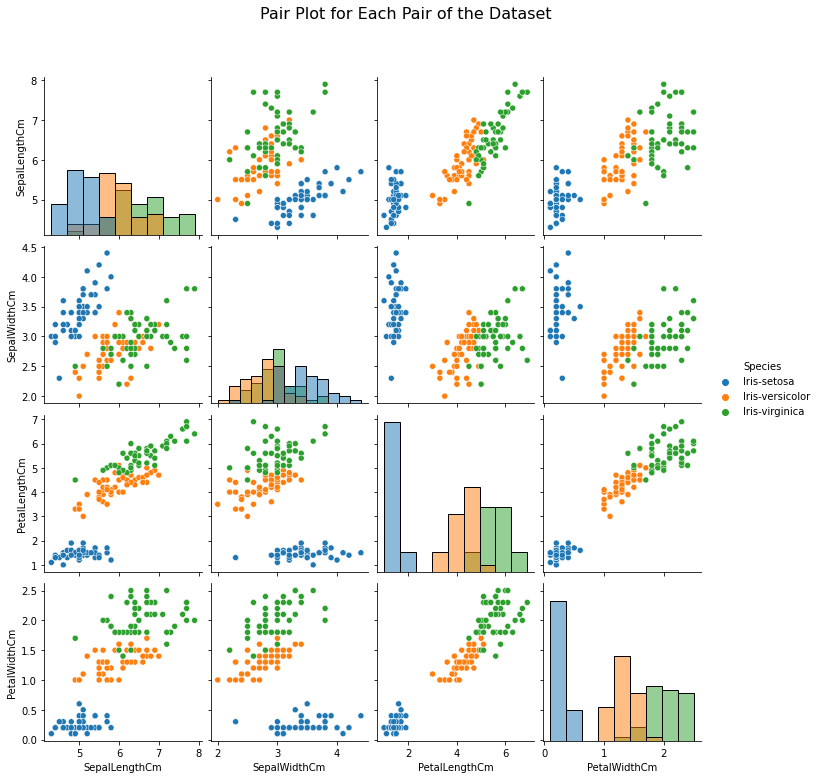

In [13]:
fig =  plt.figure(figsize = (15,6))
visual = sns.pairplot(data, hue =  'Species', diag_kind = 'hist')
visual.fig.suptitle("Pair Plot for Each Pair of the Dataset", y = 1.08, fontsize =  16)
plt.show()

Correlation Heatmap between Features

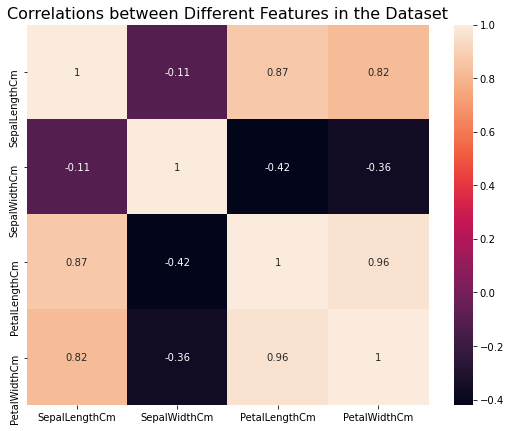

In [14]:
plt.figure(figsize=(9,7))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlations between Different Features in the Dataset',fontsize =  16)
plt.show()

Data Preparation

In [16]:
X = data.iloc[:, 0:4]
X = X.values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Y =  (data.iloc[:, 4])
Y = Y.values
Y[0:5]